In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pes-ec-mi-competition-a/sample_submission.csv
/kaggle/input/pes-ec-mi-competition-a/train.csv
/kaggle/input/pes-ec-mi-competition-a/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/pes-ec-mi-competition-a/train.csv')
test_data=pd.read_csv('/kaggle/input/pes-ec-mi-competition-a/test.csv')
train_data['label']

0             pop
1            jazz
2           disco
3            rock
4            jazz
          ...    
8986       hiphop
8987    classical
8988      country
8989        blues
8990      country
Name: label, Length: 8991, dtype: object

In [3]:
salary_nan_count = train_data['label'].isna().sum()

print(salary_nan_count)

0


In [4]:
genre_mapping = {
    'blues': 0,
    'classical': 1,
    'country': 2,
    'disco': 3,
    'hiphop': 4,
    'jazz': 5,
    'metal': 6,
    'pop': 7,
    'reggae': 8,
    'rock': 9
}

# Use the map function to encode the labels
train_data['label_encoded'] = train_data['label'].map(genre_mapping)
print(train_data['label_encoded'] )

train_data.drop('label', axis=1, inplace=True)
if 'label' in train_data.columns:
    print("The 'label' column is present in train_data.")
else:
    print("The 'label' column is not present in train_data.")


0       7
1       5
2       3
3       9
4       5
       ..
8986    4
8987    1
8988    2
8989    0
8990    2
Name: label_encoded, Length: 8991, dtype: int64
The 'label' column is not present in train_data.


In [5]:
train_data.rename(columns={'label_encoded': 'label'}, inplace=True)

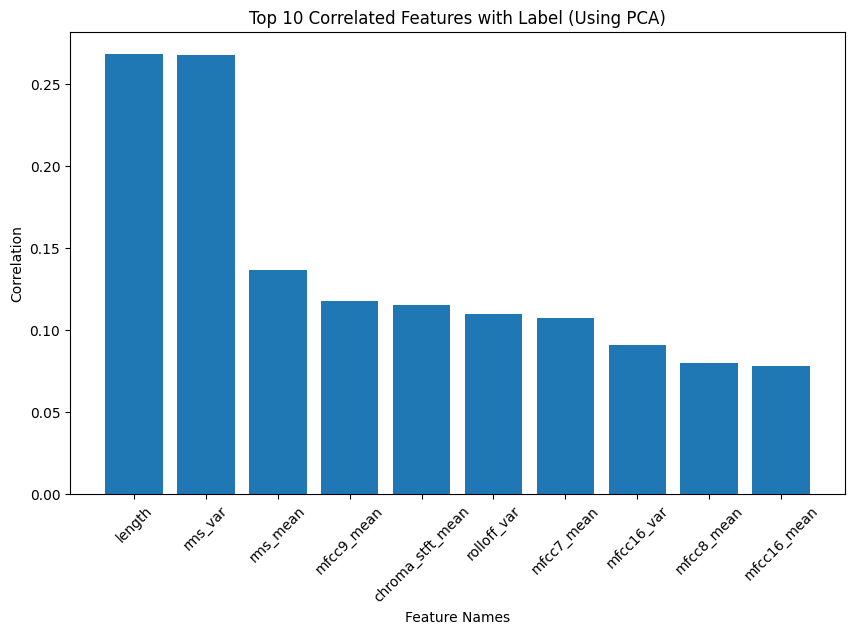

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Extract features and target
X = train_data.iloc[:, 1:-1]  # Features
y = train_data['label']  # Target variable

# Apply PCA for dimensionality reduction
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X)

# Calculate the correlations between PCA components and the target variable
correlations = [np.abs(np.corrcoef(X_pca[:, i], y)[0, 1]) for i in range(X_pca.shape[1])]

# Sort the components by their correlation with the target
sorted_indices = np.argsort(correlations)[::-1]

# Select the top 10 components
top_10_indices = sorted_indices[:10]

# Get the feature names corresponding to the selected components
top_10_feature_names = X.columns[top_10_indices]

# Plot the correlations
plt.figure(figsize=(10, 6))
plt.bar(top_10_feature_names, [correlations[i] for i in top_10_indices])
plt.title("Top 10 Correlated Features with Label (Using PCA)")
plt.xlabel("Feature Names")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.show()


In [7]:
X_train=train_data.iloc[:, 1:-1]
X_test = test_data.iloc[:, :-1]
y_train=train_data['label']

In [8]:
print(X_train.shape)

(8991, 58)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the weighted k-NN classifier
k = 3 # You can adjust the number of neighbors (k) as needed
weights = 'distance'  # Use distance-based weights

knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=weights)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

print(y_pred)


[9 6 7 2 0 2 6 4 3 8 3 7 6 9 9 6 1 9 5 2 3 1 3 2 4 5 4 8 8 8 1 4 5 1 3 5 3
 1 0 2 7 4 5 9 7 5 3 1 0 9 8 8 9 8 1 3 1 0 1 4 6 2 0 1 2 5 8 9 4 5 2 8 8 8
 0 0 3 7 1 3 0 7 7 0 3 8 4 4 2 8 2 2 6 9 4 3 3 0 0 4 5 8 3 3 1 2 0 6 6 5 3
 7 1 6 8 5 2 1 6 6 7 4 5 0 2 9 6 6 3 3 7 9 2 9 6 0 3 5 6 1 4 9 2 4 2 3 5 1
 8 3 9 6 2 0 3 2 5 3 4 0 9 9 4 7 3 2 1 9 1 2 8 2 3 2 1 3 0 2 1 1 5 3 6 2 0
 7 5 9 8 1 1 3 4 6 7 4 8 5 8 5 2 3 7 8 5 6 9 4 5 0 5 4 5 8 3 3 2 9 4 3 9 4
 5 9 7 3 2 6 8 2 7 0 0 0 4 4 5 8 1 2 4 9 5 0 8 7 7 9 4 0 2 8 9 7 5 1 0 2 1
 4 0 5 0 8 8 7 9 1 5 9 9 3 7 2 9 8 3 9 3 6 7 6 8 2 3 7 4 7 2 6 6 7 6 2 4 9
 8 1 5 4 7 5 4 1 6 1 6 8 1 0 7 7 5 6 6 5 8 4 9 9 5 8 3 0 3 7 1 5 9 5 5 8 3
 5 9 8 6 8 2 4 3 9 0 7 6 4 5 8 9 6 2 9 3 1 9 7 3 5 7 4 2 5 1 0 9 1 8 9 7 9
 0 8 3 2 3 1 7 8 0 8 1 2 1 3 3 1 8 0 6 2 6 4 9 9 6 9 8 2 2 3 5 6 6 2 2 2 5
 3 5 7 7 6 7 2 5 3 4 1 5 2 1 8 4 0 6 5 3 4 1 3 5 7 3 2 6 9 6 6 7 2 4 0 3 3
 1 4 3 6 1 8 6 8 6 0 9 6 3 3 8 3 6 9 1 4 8 5 6 8 4 5 7 0 1 3 0 3 2 5 9 8 5
 8 8 5 2 8 5 8 1 5 2 9 8 

In [10]:
import pandas as pd

# Generate the 'id' column with values from 0 to 99
#ids = list(range(100))

# Assuming 'test' and 'predictions_sarimax' are defined
submission_data = pd.DataFrame({
    'id': test_data['id'],
    'Label': y_pred
})

# Save the submission DataFrame to a CSV file
submission_data.to_csv('submission.csv', index=False)

# Print the submission DataFrame
print("Submission Data:")
print(submission_data)

Submission Data:
       id  Label
0    9586      9
1    6984      6
2    7047      7
3    2510      2
4      34      0
..    ...    ...
994  4583      4
995  6045      6
996  1897      1
997  3565      3
998  5685      5

[999 rows x 2 columns]
